Gerard Marrugat

## Constrained optimization: equality constraints

### Sequential Quadratic Programming

In [108]:
import numpy as np
import scipy.linalg 
import matplotlib.pyplot as plt

**1. One simple way to proceed is to take $\alpha^k = 1$ and update the current point. This is a simple
way to proceed that is proposed to perform first. The stopping condition should be performed
over $\nabla_xL$. Test this approach and check if it works.**

In [109]:
def grad_L(x_k,lambda_k):
    
    grad_L_x0 = 3*np.exp(3*x_k[0]) - lambda_k*2*x_k[0] 
    grad_L_x1 = -4*np.exp(-4*x_k[1]) - lambda_k*2*x_k[1]
    
    grad_L = np.array([grad_L_x0,grad_L_x1])
    
    return(grad_L)

def grad_2_L(x_k,lambda_k):
    
    grad_L_x0x0 = 9*np.exp(3*x_k[0])-lambda_k*2
    
    grad_L_x0x1 = 0.0
    
    grad_L_x1x0 = 0.0
    
    grad_L_x1x1 = 16*np.exp(-4*x_k[1])-lambda_k*2
    
    grad_2_L = np.array([[grad_L_x0x0,grad_L_x0x1],[grad_L_x1x0,grad_L_x1x1]])
    
    return(grad_2_L)

def grad_h(x_k):
    
    grad_x0 = 2*x_k[0]
    
    grad_x1 = 2*x_k[1]
    
    grad_h = np.array([grad_x0,grad_x1]).reshape(2,1)
    
    return(grad_h)

def h_func(x_k):
    
    result = x_k[0]**2 + x_k[1]**2 - 1
    
    return(result)

In [110]:
x_ini =[-1,1]
lambda_0 = -1

x_k = x_ini
lambda_k = lambda_0
alpha_k = 1 
lagran_sol = np.append(x_k,lambda_k)
k = 0

while True:
    
    #Previous step: construct the Newton linear system
    grad_x_L = grad_L(x_k,lambda_k)
    grad_xx_L = grad_2_L(x_k,lambda_k)
    grad_x_h = grad_h(x_k)
    h = h_func(x_k)

    col_1 = np.concatenate((grad_xx_L,-grad_x_h.T),axis=0)
    col_2 = np.concatenate((-grad_x_h,np.zeros(1).reshape(1,1)),axis=0)
    M_fooc = np.concatenate((col_1,col_2),axis=1) # first-order optimality conditions

    r = np.append(-grad_x_L,h)
    #Step 1. Solve the Newton linear system
    newton_sol = scipy.linalg.solve(M_fooc,r)

    d_k = newton_sol[:2]
    v_k = newton_sol[2]

    #Step 2. Use Newton method to minimize Lagrangian
    lagran_sol = lagran_sol + alpha_k*newton_sol
    
    x_k = lagran_sol[:2]
    lambda_k = lagran_sol[2]
    
    k+=1
    
    if all(grad_x_L < 1e-3):
        
        print('First Order Optimality Condition has been achieved')
        
        break
        
print('Gradient of Lagrangian is: ',grad_x_L)
print('Achieved point :',x_k)
print('Lambda: ', lambda_k)
print('Iterations: ',k)
        

First Order Optimality Condition has been achieved
Gradient of Lagrangian is:  [-2.15881861e-06  3.30163995e-06]
Achieved point : [-0.74833549  0.66332043]
Lambda:  -0.2123249355295414
Iterations:  4


The method has converged to the point $(x_1^*,x_2^*) \approx (-0.74834, 0.66332)^T$ with $\lambda^* \approx -0.21233$, as it has been told in the exercise explanation.

** 2. As you may have guessed, this basic iteration also has drawbacks, leading to a number of vital
questions. It is a Newton-like iteration, and thus may diverge from poor starting points. In
this example we have started from a point that is near to the optimal solution. Try to perform
some experiments with starting points that are farther away of the optimal solution.** 

First, we wrap the code of the previous exercise in a function called SQO_method, which has the initial point and the initial lambda as parameters.

In [111]:
def SQO_method(x_ini, lambda_0):
    
    x_k = x_ini
    lambda_k = lambda_0
    alpha_k = 1 
    lagran_sol = np.append(x_k,lambda_k)
    k = 0
    grad_L_list = []

    while True:
    
        #Previous step: construct the Newton linear system
        grad_x_L = grad_L(x_k,lambda_k)
        grad_xx_L = grad_2_L(x_k,lambda_k)
        grad_x_h = grad_h(x_k)
        h = h_func(x_k)

        col_1 = np.concatenate((grad_xx_L,-grad_x_h.T),axis=0)
        col_2 = np.concatenate((-grad_x_h,np.zeros(1).reshape(1,1)),axis=0)
        M_fooc = np.concatenate((col_1,col_2),axis=1) # first-order optimality conditions

        r = np.append(-grad_x_L,h)
        #Step 1. Solve the Newton linear system
        newton_sol = scipy.linalg.solve(M_fooc,r)

        d_k = newton_sol[:2]
        v_k = newton_sol[2]

        #Step 2. Use Newton method to minimize Lagrangian
        lagran_sol = lagran_sol + alpha_k*newton_sol
    
        x_k = lagran_sol[:2]
        lambda_k = lagran_sol[2]
    
        k+=1
        
        grad_L_list.append(grad_x_L)
    
        if all(grad_x_L < 1e-3):
        
            print('First Order Optimality Condition has been achieved')
        
            break
        
    print('Gradient of Lagrangian is: ',grad_x_L)
    print('Achieved point :',x_k)
    print('Lambda: ', lambda_k)
    print('Iterations: ',k)
    
    
    

In [113]:
x_ini = [30,40]
lambda_0 = -1

SQO_method(x_ini,lambda_0)

First Order Optimality Condition has been achieved
Gradient of Lagrangian is:  [-3.87146026e+40 -1.44125876e+75]
Achieved point : [ 46.07932164 -42.66827612]
Lambda:  -4.3517241089094483e+39
Iterations:  4


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.105919e-39
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.107818e-39
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.477507e-112
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.365924e-113


In [114]:
x_ini = [7,1]
lambda_0 = -1

SQO_method(x_ini,lambda_0)

First Order Optimality Condition has been achieved
Gradient of Lagrangian is:  [-6.88088377e+11 -8.67024320e+36]
Achieved point : [ -7.4542751  -20.66666646]
Lambda:  -8735132582.13729
Iterations:  3


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.318765e-46
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.259577e-45


As it could be observed, there are starting points that not allow us to move towards the optimal solution. The value of $\nabla_x L(x,\lambda)$ increases at each iteration, and the method diverges.

To clarify this fact, a graphical representation of the Lagrangian is provided. Remember that in constrained optimization, the Lagrangian function allows to convert a constrained problem into an unconstrained one. Then, with a gradient descent over the Lagrangian the optimum may be optained.<br>In our case, the Lagrange multiplier has a value equal to $-1$.

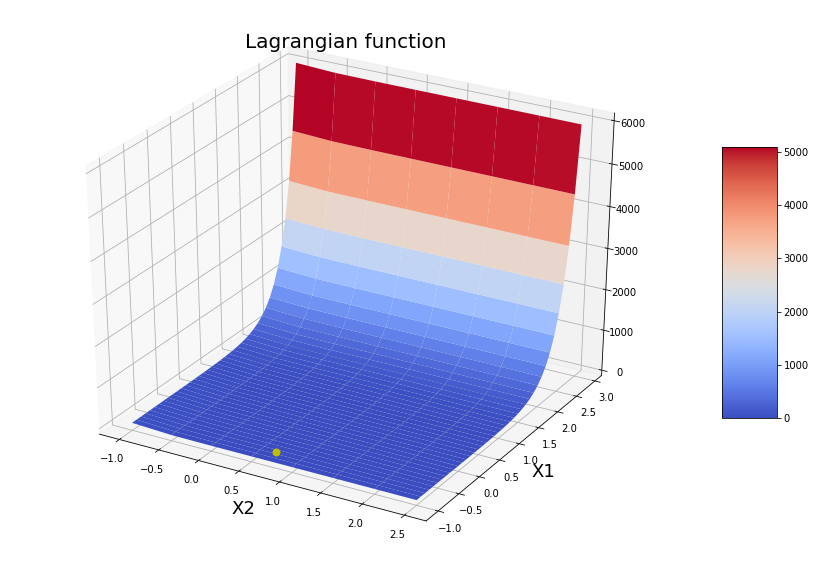

In [115]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def Lagrangian(x,lambda_0):
    return(np.exp(3*x[:,0])+np.exp(-4*x[:,1]) + lambda_0*(x[:,0]**2+x[:,1]**2 - 1))
    

x1 = np.arange(-1,3,0.1)
x2 = np.arange(-1,3,0.5)

X1,X2 = np.meshgrid(x1,x2)
X_grid = np.c_[np.ravel(X1),np.ravel(X2)]
lambda_0 = -1
Z = Lagrangian(X_grid,lambda_0)
Z = Z.reshape(X1.shape)

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
bar = ax.plot_surface(X2,X1,Z,cmap = cm.coolwarm)

x1_sol = -0.74834
x2_sol = 0.66332
X1_sol, X2_sol = np.meshgrid(x1_sol,x2_sol)
X_sol_grid = np.c_[np.ravel(X1_sol),np.ravel(X2_sol)]
Z_sol = Lagrangian(X_sol_grid,lambda_0)
ax.plot(X2_sol, X1_sol, Z_sol, markerfacecolor='y', markeredgecolor='y', marker='o', markersize=7, alpha=1)

ax.set_xlabel('X2',fontsize=18)
ax.set_ylabel('X1',fontsize=18)
plt.title('Lagrangian function',fontsize=20)
fig.colorbar(bar,shrink = 0.5, aspect = 5)

The yellow dot, is the optimal solution, but only the points that are located near it (blue region), are able to converge to it. Points located in the red area can not find a way to converge to the optimal solution, and finally the Sequential Quadratic Optimization method diverges. The starting points seen in this exercise 2 are examples of points in the red area. 

**3. One way to find the optimal solution is to start the optimization with another function that
allows us to find an approximation to the solution we are looking for. In other words, we would
like to find a solution to the problem that is near to the optimum solution we are looking for.
Once an approximate solution is found, we can apply the technique we have presented in this
lab to find the optimal solution. The function that allows us to find an approximation to the solution we are looking for is
called, in this context, the merit function. Usually, a merit function is the sum of terms
that include the objective function and the amount of infeasibility of the constraints. One
example of a merit function for the problem we a treating is the quadratic penalty function
(i.e. constraints are penalized quadratically)
<br>
$$
M(x1, x2) = f(x1, x2) + \rho h(x1, x2)^2
$$
<br>
where $\rho$ is some positive number. The greater the value of $\rho$, the greater the penalty for
infeasibility. The difficulty arises in defining a proper merit function for a particular equality
constrained problem.
In this exercise we propose you to take $\rho$ = 10 and perform a classical gradient descent
(with backtraking, for instance) to find and approximation to the solution we are looking for.
Observe if you arrive near to the optimal solution of the problem.
** 

In this next experiment what we want to achieve is to find a method that allows us to converge to the optimal solution from every possible point. The merit function brings us to a point very near to the optimal solution. Once there, this point could be considered a good starting point to use with our first implemented method, Sequential Quadratic Optimization, because it is near our optimal solution and our method is able to converge to it.

In [116]:
def merit(x_k,rho):
    
    result = np.exp(3*x_k[0])+np.exp(-4*x_k[1]) + rho*(x_k[0]**2 + x_k[1]**2 - 1)**2
    
    return(result)

def grad_merit(x_k,rho):
    
    grad_M_x1 = 3*np.exp(3*x_k[0]) + 4*rho*(x_k[0]**2 + x_k[1]**2 - 1)*x_k[0]
    
    grad_M_x2 = -4*np.exp(-4*x_k[1]) + 4*rho*(x_k[0]**2 + x_k[1]**2 - 1)*x_k[1]
    
    grad_M =np.array([grad_M_x1,grad_M_x2])
    
    return(grad_M)
    
    

In [117]:
def merit_sol(x_k,rho):

    xk_list = []
    xk_list.append(x_k)
    alpha = 1
    x_candidate = np.subtract(x_k,alpha*grad_merit(x_k,rho))

    k = 0

    while True:

        alpha = 1

        while(merit(x_candidate,rho) >= merit(x_k,rho)):

            alpha = alpha/2
            x_candidate = np.subtract(x_k,alpha*grad_merit(x_k,rho))
        
    
        xk_list.append(x_candidate.tolist())
        x_k = x_candidate
        x_candidate = np.subtract(x_k,alpha*grad_merit(x_k,rho))
        k+=1
    
        if (abs((merit(x_candidate,rho) - merit(x_k,rho)))<(10**-3)):
            print('Stopping criterion is satisfied: ',abs((merit(x_candidate,rho) - merit(x_k,rho))))
            break
        
    print('Number of steps needed to converge:',k)
    print('The minimum reached is: ',x_candidate)
    return(x_candidate)


To demonstrate that merit function allow us to reach a point near the optimal solution $(x_1^*,x_2^*) \approx (-0.74834, 0.66332)^T$, we will use the starting point found in exercise 2 that diverges $(x_1^0,x_2^0) = (30, 40)$.

In [118]:
x_ini = [30,40]
rho = 10

x_merit = merit_sol(x_ini,rho)

Stopping criterion is satisfied:  6.733845155657003e-05
Number of steps needed to converge: 37
The minimum reached is:  [-0.78851875  0.62889665]


The reached point is $(x_1,x_2) = (-0.78851875, 0.62889665)^T$ which is a clear approximation to the optimal point $(x_1^*,x_2^*) \approx (-0.74834, 0.66332)^T$

**4. The proposed method has some drawbacks, among we may mention the fact that the minimizers
of the merit function $M(x1, x2)$ do not necessarily have to coincide with the minimizers of
the constrained problem. One way to proceed is to use the merit function method to approach
the solution. Once we have approached it “sufficiently” the Newton method ($\alpha$ = 1) may be
used to find the solution to the problem.
Therefore the next experiments are proposed
<br>
(a) Start with the Merit function to obtain an approximation to the optimal point we are
looking for.
<br>
(b) Implement the minimization method using the solution of Merit function as starting
point for the method we have presented here (i.e. for the Lagrangian).**

Following the exercise 2, where the Sequential Quadratic Optimization diverged depending on the initial point, we use the same initial conditions ($(x_1^0,x_2^0) = (30, 40)$, $\lambda^0 = -1$) to prove that the combination explained in the statement works properly.

In [119]:
x_ini = [30,40]

#Reach a point near the optimal solution using the merit function
rho = 10
x_merit = merit_sol(x_ini,rho)

#Use the reached point as initial point for our SQO method
lambda_0 = 60
SQO_method(x_merit, lambda_0)

Stopping criterion is satisfied:  6.733845155657003e-05
Number of steps needed to converge: 37
The minimum reached is:  [-0.78851875  0.62889665]
First Order Optimality Condition has been achieved
Gradient of Lagrangian is:  [ 1.35768194e-04 -1.12622044e-05]
Achieved point : [-0.74833549  0.66332043]
Lambda:  -0.2123249314308541
Iterations:  5


As we were told, the optimal solution is achieved $(x_1^*,x_2^*) \approx (-0.74834 , 0.66332)$ with $\lambda^* \approx -0.21233$.